In [204]:
from faker import Faker
import random
import numpy as np
import pandas as pd

In [205]:
np.random.seed(0)
num_samples=1000
Degree=['Kollam','Ernakulam','Trivandrum','Thrissur','Palakkad']
choice=['Yes','No']
fake=Faker()
Seller=[fake.name() for _ in range(num_samples)]
Location=[random.choice(Degree) for _ in range(num_samples)]
area=[round(random.uniform(50, 500), 2) for _ in range(num_samples)]
Bedrooms=np.random.randint(1,6,size=num_samples)
Bathrooms=np.random.randint(1,5,size=num_samples)
pool = [random.choice(choice) for _ in range(num_samples)]
garden = [random.choice(choice) for _ in range(num_samples)]
garage = np.random.randint(0, 4, size=num_samples)
data=pd.DataFrame({
    'Seller Name':Seller,
    'House Location':Location,
    'Area':area,
    'Bedrooms':Bedrooms,
    'Bathrooms':Bathrooms,
    'Pool':pool,
    'Garden':garden,
    'Garage':garage,
    })
def calculatePrice(row):
    price= 50000 + 700 * row['Area'] + 20000 * row['Bedrooms'] + 15000 * row['Bathrooms'] + 5000 * row['Garage'] + np.random.normal(0, 25000)
    if row['Pool']=="Yes":
        price+= 40000
    if row['Garden']=="Yes":
        price+=15000
    price = np.round(price, 2)
    return price
data['Price']=data.apply(calculatePrice,axis=1)
missing_values_prob = 0.03
for column in data.columns:
 if column=='Seller Name':
    continue
 data[column] = data[column].apply(lambda x: np.nan if random.random() < missing_values_prob else x)
data.head(n=15)

,Seller Name,House Location,Area,Bedrooms,Bathrooms,Pool,Garden,Garage,Price
0,Patrick Lowe,Kollam,NaN,5.0,4.0,No,No,1.0,523038.99
1,Ricky Martin,Trivandrum,133.44,1.0,NaN,No,No,0.0,NaN
2,Sabrina Hawkins,Trivandrum,171.15,4.0,4.0,Yes,Yes,1.0,381237.74
3,Barbara Holt,Ernakulam,458.69,4.0,3.0,No,Yes,1.0,540141.54
4,Kenneth Haas,Ernakulam,452.58,4.0,1.0,No,No,2.0,491076.92
5,James Peck,Thrissur,445.27,2.0,2.0,Yes,No,1.0,482768.21
6,Daniel Park,Ernakulam,105.76,4.0,4.0,Yes,Yes,2.0,338791.12
7,Christine Williams,Palakkad,383.95,3.0,2.0,No,No,0.0,448478.27
8,Brian Olsen,Trivandrum,472.35,5.0,3.0,No,Yes,0.0,527871.85
9,Sarah Richardson,Palakkad,89.92,1.0,4.0,No,Yes,0.0,227312.21


In [206]:
print(data.shape)
print(pd.value_counts(data.dtypes))

(1000, 9)
float64    5
object     4
Name: count, dtype: int64


C:\Users\sachi\AppData\Local\Temp\ipykernel_1072\4091025296.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(data.dtypes))


In [207]:
data.describe(exclude="number")

,Seller Name,House Location,Pool,Garden
count,1000,965,972,971
unique,993,5,2,2
top,Michelle Anderson,Trivandrum,Yes,Yes
freq,2,199,510,498


In [208]:
data.describe(exclude="object")

,Area,Bedrooms,Bathrooms,Garage,Price
count,973.000000,963.000000,965.000000,965.000000,971.000000
mean,274.702251,3.002077,2.512953,1.536788,376670.909114
std,132.131408,1.406103,1.132822,1.109158,104058.451199
min,50.100000,1.000000,1.000000,0.000000,106882.070000
25%,155.210000,2.000000,1.000000,1.000000,296433.810000
50%,271.240000,3.000000,3.000000,2.000000,374535.460000
75%,396.080000,4.000000,4.000000,3.000000,456130.715000
max,499.640000,5.000000,4.000000,3.000000,609450.360000


<Axes: title={'center': 'Unique values per feature'}>

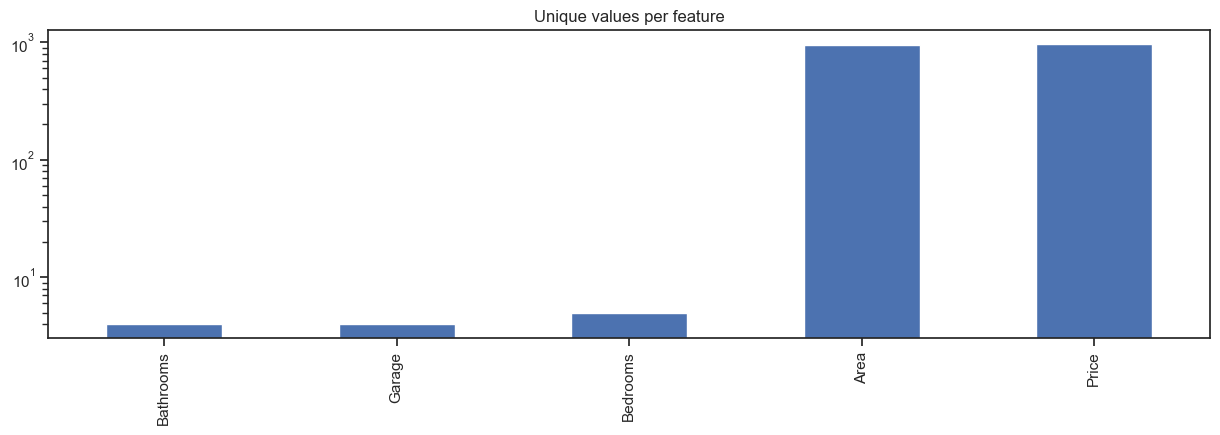

In [209]:
unique_values = data.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

<Axes: title={'center': 'Unique values per feature'}>

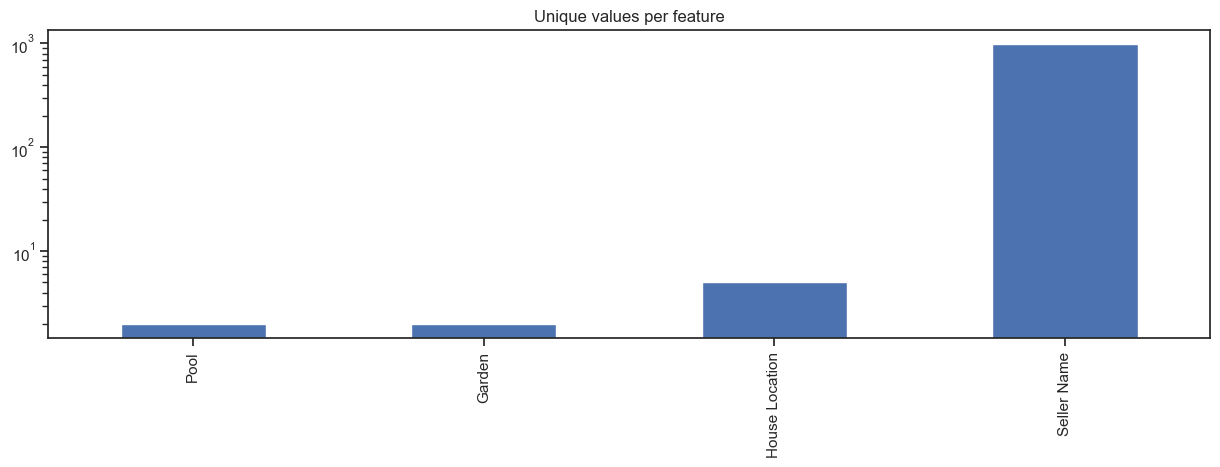

In [210]:
unique_values = data.select_dtypes(include="object").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

In [211]:
duplicates = data.drop(labels=["Seller Name"], axis=1).duplicated().sum()
print(f"You seem to have {duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


In [212]:
data.head(n=15).isnull()

,Seller Name,House Location,Area,Bedrooms,Bathrooms,Pool,Garden,Garage,Price
0,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [213]:
data.isnull().sum()

Seller Name        0
House Location    35
Area              27
Bedrooms          37
Bathrooms         35
Pool              28
Garden            29
Garage            35
Price             29
dtype: int64

In [214]:
missing_count=data.isnull().sum()
missing_percentage = (missing_count / len(data)) * 100
print(missing_percentage)

Seller Name       0.0
House Location    3.5
Area              2.7
Bedrooms          3.7
Bathrooms         3.5
Pool              2.8
Garden            2.9
Garage            3.5
Price             2.9
dtype: float64


In [215]:
import missingno as msno

Text(0, 0.5, 'Sample Number')

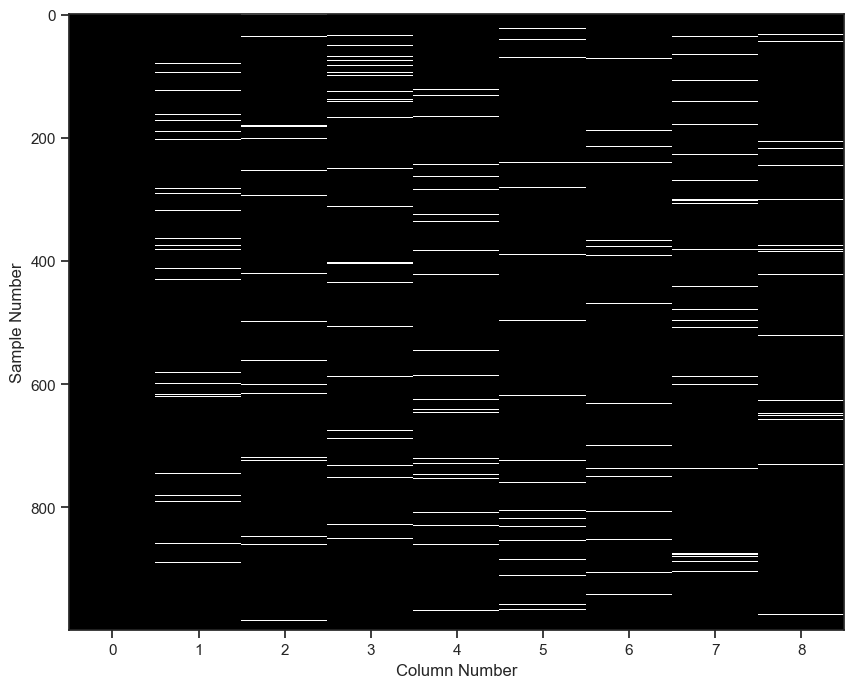

In [216]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

<Axes: >

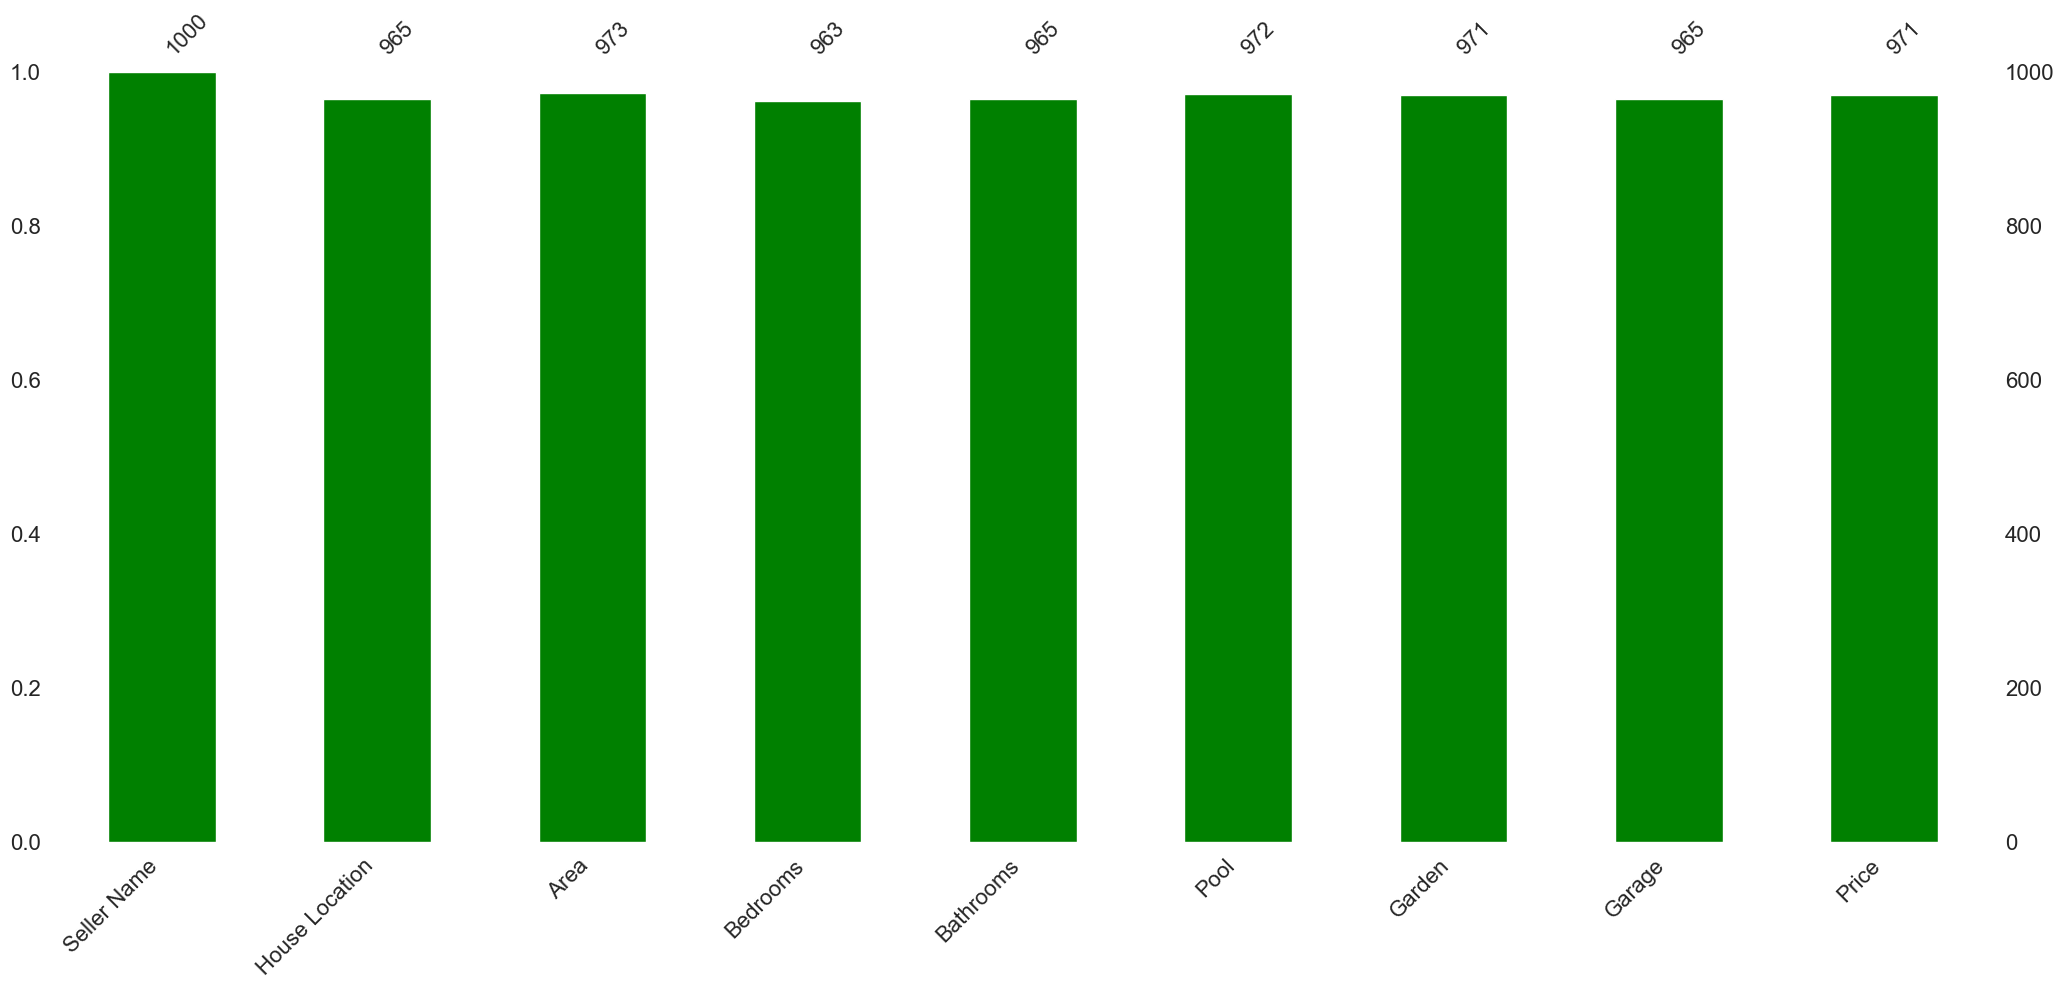

In [217]:
msno.bar(data,color='green')

In [218]:

most_frequent_Location = data['House Location'].mode()[0]
data['House Location'].fillna(most_frequent_Location, inplace=True)
data.head(n=10)

,Seller Name,House Location,Area,Bedrooms,Bathrooms,Pool,Garden,Garage,Price
0,Patrick Lowe,Kollam,NaN,5.0,4.0,No,No,1.0,523038.99
1,Ricky Martin,Trivandrum,133.44,1.0,NaN,No,No,0.0,NaN
2,Sabrina Hawkins,Trivandrum,171.15,4.0,4.0,Yes,Yes,1.0,381237.74
3,Barbara Holt,Ernakulam,458.69,4.0,3.0,No,Yes,1.0,540141.54
4,Kenneth Haas,Ernakulam,452.58,4.0,1.0,No,No,2.0,491076.92
5,James Peck,Thrissur,445.27,2.0,2.0,Yes,No,1.0,482768.21
6,Daniel Park,Ernakulam,105.76,4.0,4.0,Yes,Yes,2.0,338791.12
7,Christine Williams,Palakkad,383.95,3.0,2.0,No,No,0.0,448478.27
8,Brian Olsen,Trivandrum,472.35,5.0,3.0,No,Yes,0.0,527871.85
9,Sarah Richardson,Palakkad,89.92,1.0,4.0,No,Yes,0.0,227312.21


In [219]:

most_frequent_Pool = data['Pool'].mode()[0]
data['Pool'].fillna(most_frequent_Pool, inplace=True)
most_frequent_Garden = data['Garden'].mode()[0]
data['Garden'].fillna(most_frequent_Garden, inplace=True)
data.head(n=10)

,Seller Name,House Location,Area,Bedrooms,Bathrooms,Pool,Garden,Garage,Price
0,Patrick Lowe,Kollam,NaN,5.0,4.0,No,No,1.0,523038.99
1,Ricky Martin,Trivandrum,133.44,1.0,NaN,No,No,0.0,NaN
2,Sabrina Hawkins,Trivandrum,171.15,4.0,4.0,Yes,Yes,1.0,381237.74
3,Barbara Holt,Ernakulam,458.69,4.0,3.0,No,Yes,1.0,540141.54
4,Kenneth Haas,Ernakulam,452.58,4.0,1.0,No,No,2.0,491076.92
5,James Peck,Thrissur,445.27,2.0,2.0,Yes,No,1.0,482768.21
6,Daniel Park,Ernakulam,105.76,4.0,4.0,Yes,Yes,2.0,338791.12
7,Christine Williams,Palakkad,383.95,3.0,2.0,No,No,0.0,448478.27
8,Brian Olsen,Trivandrum,472.35,5.0,3.0,No,Yes,0.0,527871.85
9,Sarah Richardson,Palakkad,89.92,1.0,4.0,No,Yes,0.0,227312.21


In [220]:
data['Bedrooms'].fillna(int(data['Bedrooms'].mean()), inplace=True)
data['Bathrooms'].fillna(int(data['Bathrooms'].mean()), inplace=True)
data['Area'].fillna(data['Area'].mean(), inplace=True)
data['Garage'].fillna(int(data['Garage'].mean()), inplace=True)
data['Price'].fillna(data['Price'].mean(), inplace=True)

In [221]:
# Question 1: Average Selling Price of Houses
average_price=data['Price'].mean()
print(f"1. Average Price: {average_price:.2f} INR\n")

# Question 2: Average Area of Houses
average_area=data['Area'].mean()
print(f"2. Average Area: {average_area:.2f} sq.m\n")

# Question 3: Distribution of Houses along the specified locations
House_Distribution=data['House Location'].value_counts()
print("3. House Distribution:")
print(House_Distribution)


1. Average Price: 376670.91 INR

2. Average Area: 274.70 sq.m

3. House Distribution:
House Location
Trivandrum    234
Kollam        197
Palakkad      194
Ernakulam     192
Thrissur      183
Name: count, dtype: int64


In [222]:
#Follow Up Questions

average_Bedrooms=int(data['Bedrooms'].mean())+1
print(f"Average Number of Bedrooms: {average_Bedrooms:.2f}\n")

average_Bathrooms=int(data['Bathrooms'].mean())+1
print(f"Average Number of Bathrooms: {average_Bathrooms:.2f} \n")

average_Garage=int(data['Garage'].mean())+1
print(f"Average Garage Size: {average_Garage:.2f}\n")

price_range=data['Price'].agg(['min','max'])
print(f"Price Range: {price_range['min']} INR to {price_range['max']} INR")

area_range=data['Area'].agg(['min','max'])
print(f"\nArea Range: {area_range['min']} sq.m to {area_range['max']} sq.m")

House_Distribution_Pool = data.groupby(['House Location', 'Pool']).size().unstack(fill_value=0)
print("\nHouse Distribution with Pool:")
print(House_Distribution_Pool)


Average Number of Bedrooms: 4.00

Average Number of Bathrooms: 3.00 

Average Garage Size: 2.00

Price Range: 106882.07 INR to 609450.36 INR

Area Range: 50.1 sq.m to 499.64 sq.m

House Distribution with Pool:
Pool             No  Yes
House Location          
Ernakulam        86  106
Kollam           91  106
Palakkad         89  105
Thrissur         95   88
Trivandrum      101  133


In [223]:
data.isnull()

,Seller Name,House Location,Area,Bedrooms,Bathrooms,Pool,Garden,Garage,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [224]:
data.isnull().sum()

Seller Name       0
House Location    0
Area              0
Bedrooms          0
Bathrooms         0
Pool              0
Garden            0
Garage            0
Price             0
dtype: int64

In [225]:
data.head(n=15)

,Seller Name,House Location,Area,Bedrooms,Bathrooms,Pool,Garden,Garage,Price
0,Patrick Lowe,Kollam,274.702251,5.0,4.0,No,No,1.0,523038.990000
1,Ricky Martin,Trivandrum,133.440000,1.0,2.0,No,No,0.0,376670.909114
2,Sabrina Hawkins,Trivandrum,171.150000,4.0,4.0,Yes,Yes,1.0,381237.740000
3,Barbara Holt,Ernakulam,458.690000,4.0,3.0,No,Yes,1.0,540141.540000
4,Kenneth Haas,Ernakulam,452.580000,4.0,1.0,No,No,2.0,491076.920000
5,James Peck,Thrissur,445.270000,2.0,2.0,Yes,No,1.0,482768.210000
6,Daniel Park,Ernakulam,105.760000,4.0,4.0,Yes,Yes,2.0,338791.120000
7,Christine Williams,Palakkad,383.950000,3.0,2.0,No,No,0.0,448478.270000
8,Brian Olsen,Trivandrum,472.350000,5.0,3.0,No,Yes,0.0,527871.850000
9,Sarah Richardson,Palakkad,89.920000,1.0,4.0,No,Yes,0.0,227312.210000


<Axes: >

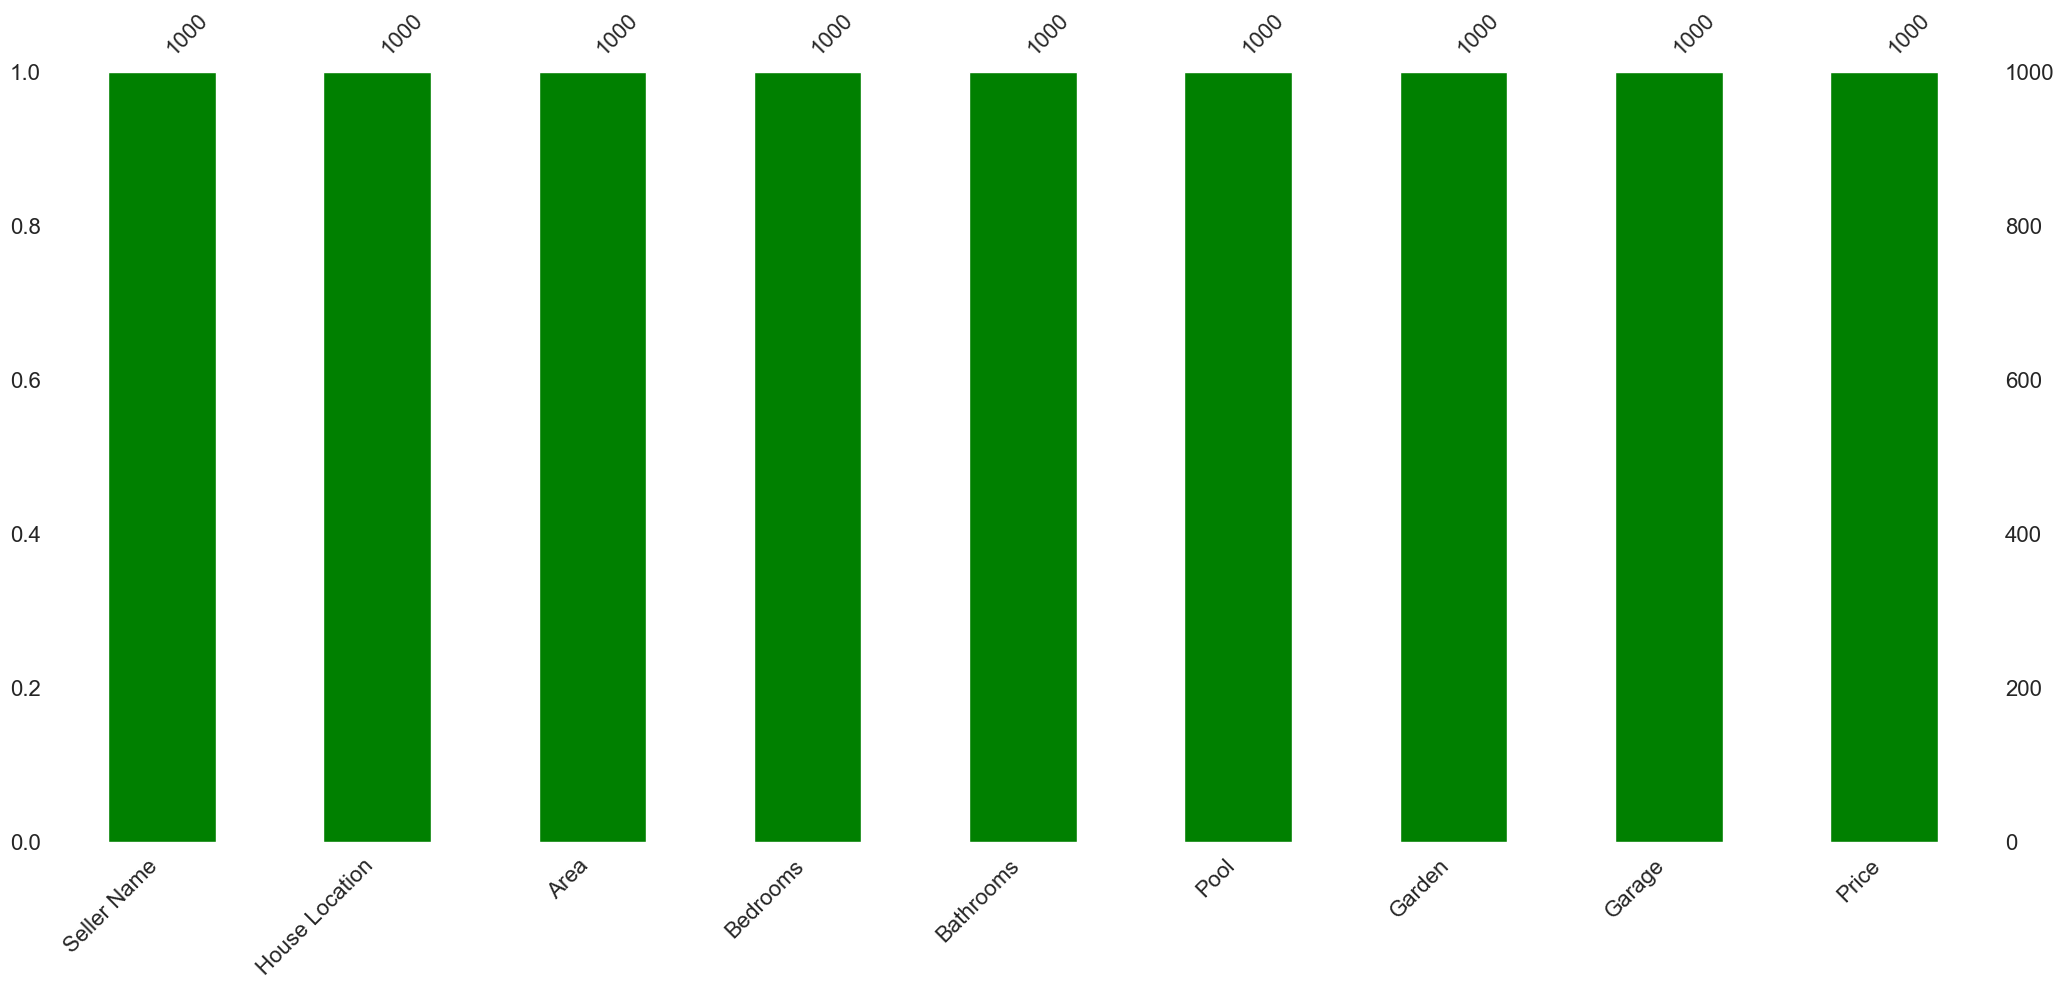

In [226]:
msno.bar(data,color='green')

In [227]:
#New Questions

House_Distribution_Garden = data.groupby(['House Location', 'Garden']).size().unstack(fill_value=0)
print("\nHouse Distribution with Garden:")
print(House_Distribution_Garden)

Bedroom_Price = data.groupby('Bedrooms')['Price'].mean()
print("\nAverage Prices by Bedrooms:")
print(Bedroom_Price)

Location_Price = data.groupby('House Location')['Price'].mean()
print("\nAverage Prices by Location:")
print(Location_Price)

Garage_Price = data.groupby('Garage')['Price'].mean()
print("\nAverage Prices by Garage Space:")
print(Garage_Price)


House Distribution with Garden:
Garden           No  Yes
House Location          
Ernakulam       104   88
Kollam           90  107
Palakkad         89  105
Thrissur         84   99
Trivandrum      106  128

Average Prices by Bedrooms:
Bedrooms
1.0    329364.135749
2.0    359548.775446
3.0    377101.021513
4.0    415475.748441
5.0    398492.281679
Name: Price, dtype: float64

Average Prices by Location:
House Location
Ernakulam     374893.398600
Kollam        378071.944491
Palakkad      384375.422981
Thrissur      366480.095395
Trivandrum    378532.111124
Name: Price, dtype: float64

Average Prices by Garage Space:
Garage
0.0    367272.105545
1.0    371162.243194
2.0    381409.039609
3.0    386743.923630
Name: Price, dtype: float64


In [228]:
print("1. Basic Information:")
print(data.info())
print("\n")

print("2. Summary Statistics:")
print(data.describe())
print("\n")

print("3. Missing Values:")
print(data.isnull().sum())
print("\n")

print("4. Unique Values:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {len(unique_values)} unique values")
print("\n")

print("5. Value Counts:")
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"{column}:\n{value_counts}\n")



1. Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Seller Name     1000 non-null   object 
 1   House Location  1000 non-null   object 
 2   Area            1000 non-null   float64
 3   Bedrooms        1000 non-null   float64
 4   Bathrooms       1000 non-null   float64
 5   Pool            1000 non-null   object 
 6   Garden          1000 non-null   object 
 7   Garage          1000 non-null   float64
 8   Price           1000 non-null   float64
dtypes: float64(5), object(4)
memory usage: 70.4+ KB
None


2. Summary Statistics:
              Area     Bedrooms    Bathrooms       Garage          Price
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000
mean    274.702251     3.002000     2.495000     1.518000  376670.909114
std     130.333618     1.379819     1.116791     1.094017  102536.970202
min

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

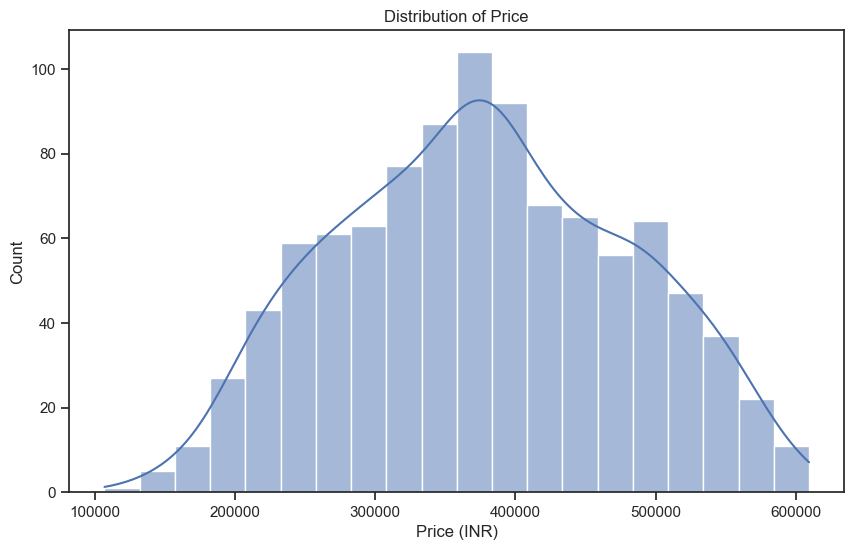

In [230]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (INR)')
plt.show()

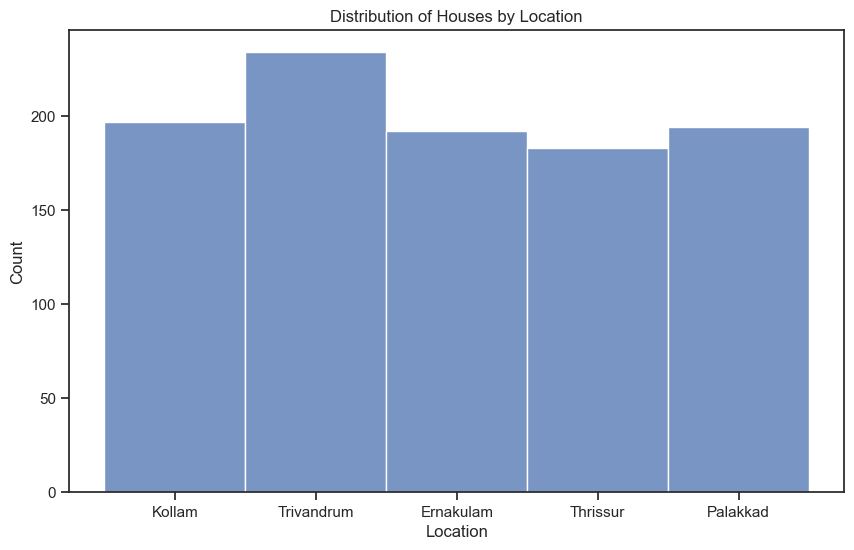

In [231]:
# Distribution of Houses by Location
plt.figure(figsize=(10, 6))
sns.histplot(data['House Location'])
plt.title('Distribution of Houses by Location')
plt.xlabel('Location')
plt.show()

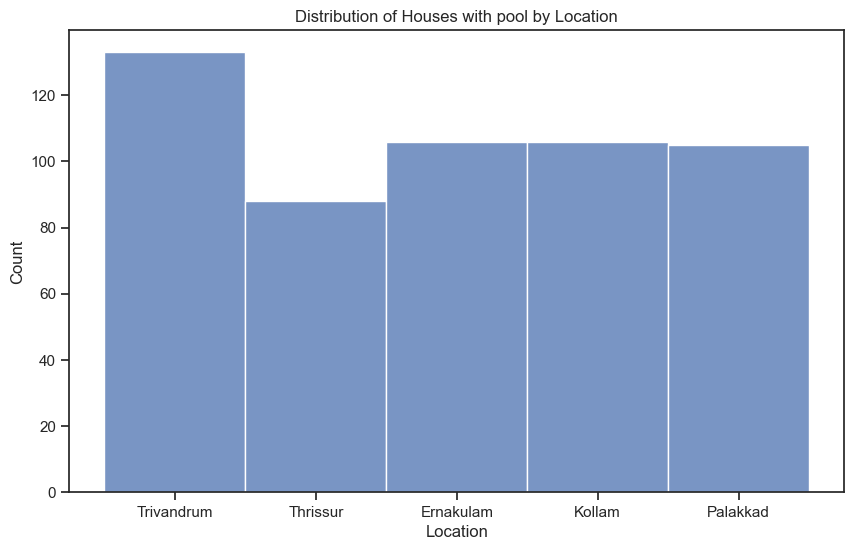

In [232]:
# Distribution of Houses with pool by Location
plt.figure(figsize=(10, 6))
data_pool = data[data['Pool'] == 'Yes']
sns.histplot(data_pool['House Location'])
plt.title('Distribution of Houses with pool by Location')
plt.xlabel('Location')
plt.show()

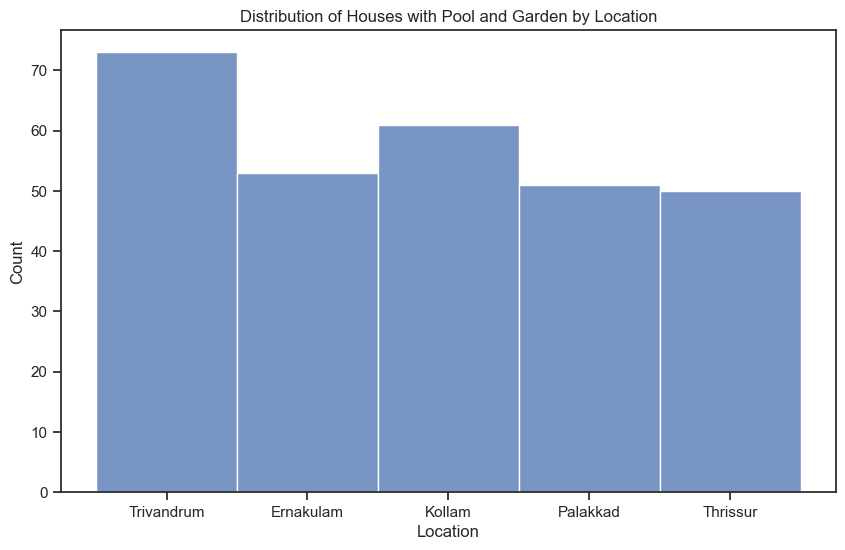

In [233]:
# Distribution of Houses with pool and Garden by Location
plt.figure(figsize=(10, 6))
data_pool = data[data['Pool'] == 'Yes']
data_pg=data_pool[data_pool['Garden']=='Yes']
sns.histplot(data_pg['House Location'])
plt.title('Distribution of Houses with Pool and Garden by Location')
plt.xlabel('Location')
plt.show()

### Visualisations

In [234]:
#Transforming Pool and Garden by Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Pool_Encoded'] = label_encoder.fit_transform(data['Pool'])
data['Garden_Encoded'] = label_encoder.fit_transform(data['Garden'])

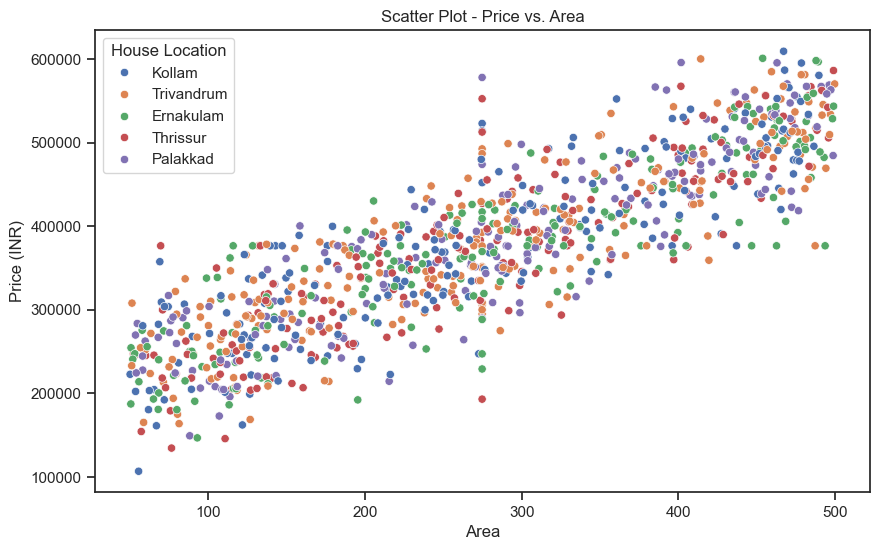

In [235]:
# 1. Scatter Plot - Price vs. Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=data, hue='House Location', marker='o')
plt.title('Scatter Plot - Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price (INR)')
plt.legend(title='House Location')
plt.show()

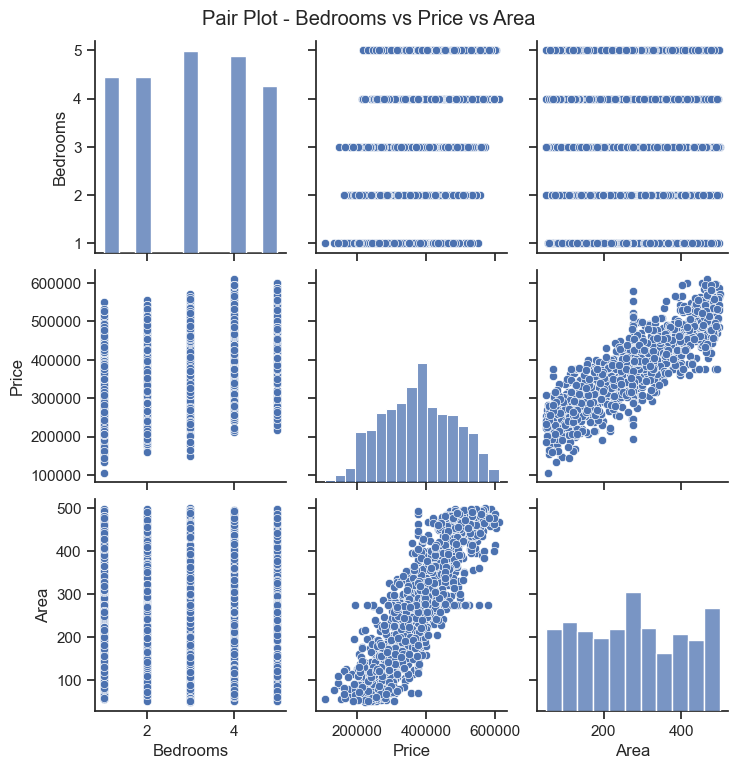

In [236]:
# 2. Pair Plot - Bedrooms vs Price vs Area
sns.pairplot(data[['Bedrooms', 'Price', 'Area']])
plt.suptitle('Pair Plot - Bedrooms vs Price vs Area', y=1.02)
plt.show()


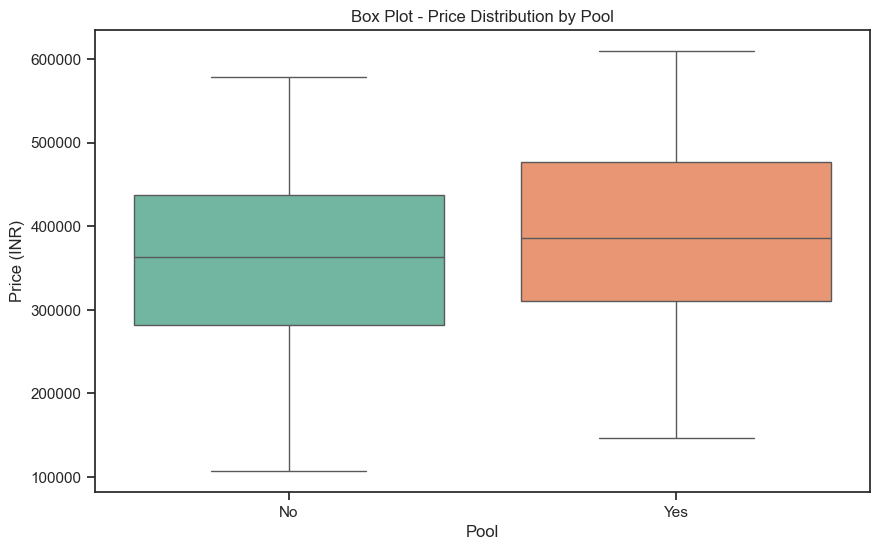

In [237]:
# 3. Box Plot - Price Distribution by Pool
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pool', y='Price', data=data, palette='Set2', hue='Pool')
plt.title('Box Plot - Price Distribution by Pool')
plt.xlabel('Pool')
plt.ylabel('Price (INR)')
plt.show()

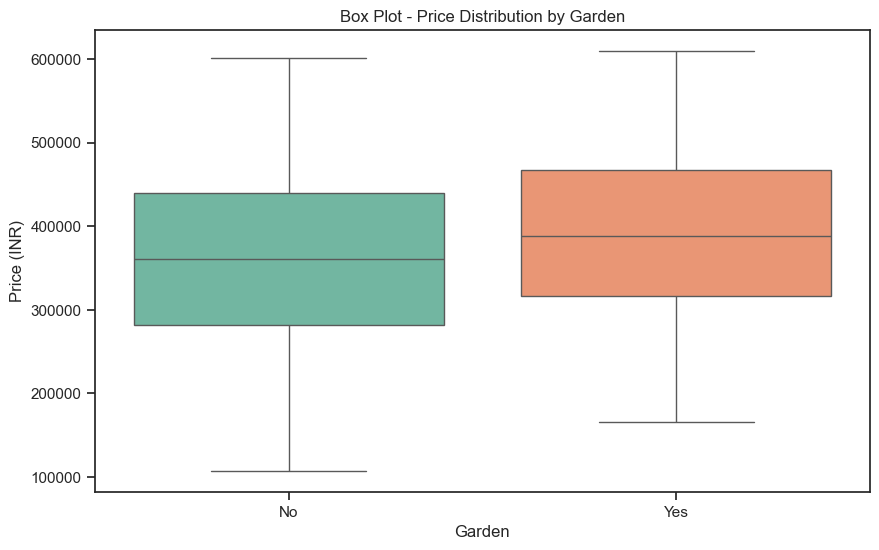

In [238]:
# 4. Box Plot - Price Distribution by Garden
plt.figure(figsize=(10, 6))
sns.boxplot(x='Garden', y='Price', data=data, palette='Set2', hue='Garden')
plt.title('Box Plot - Price Distribution by Garden')
plt.xlabel('Garden')
plt.ylabel('Price (INR)')
plt.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_1072\1284423430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='House Location', y='Price', data=data, palette='viridis')


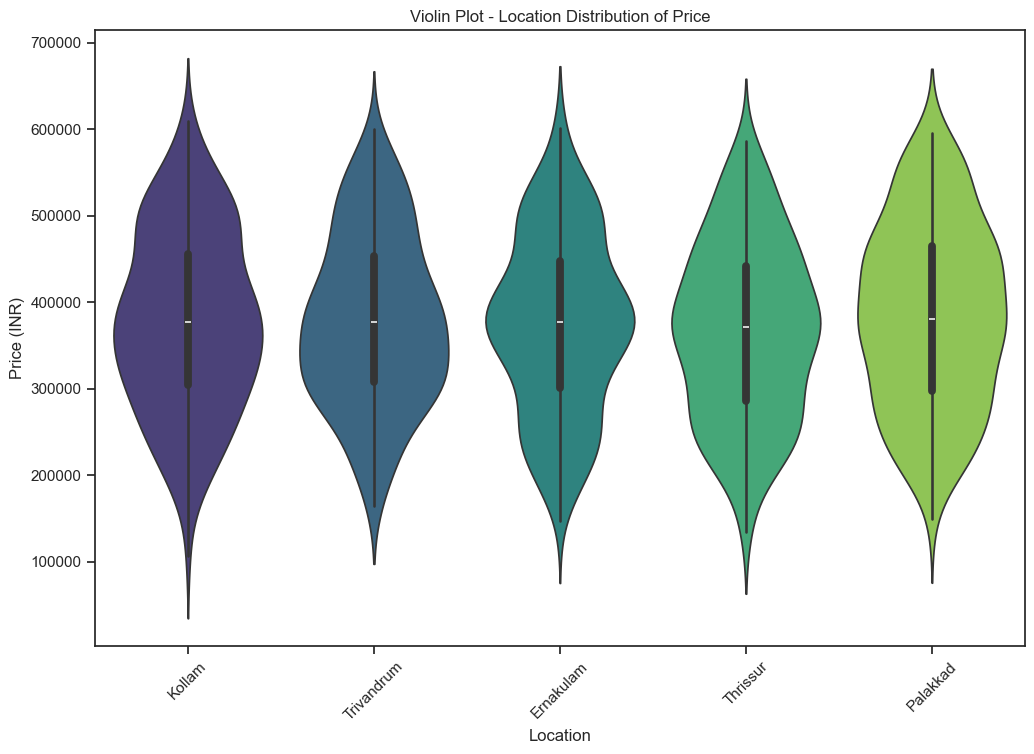

In [239]:
# 5. Violin Plot - Location Distribution of Price
plt.figure(figsize=(12, 8))
sns.violinplot(x='House Location', y='Price', data=data, palette='viridis')
plt.title('Violin Plot - Location Distribution of Price')
plt.xlabel('Location')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()



C:\Users\sachi\AppData\Local\Temp\ipykernel_1072\3038655847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Bedrooms', y='Price', data=data, palette='viridis')


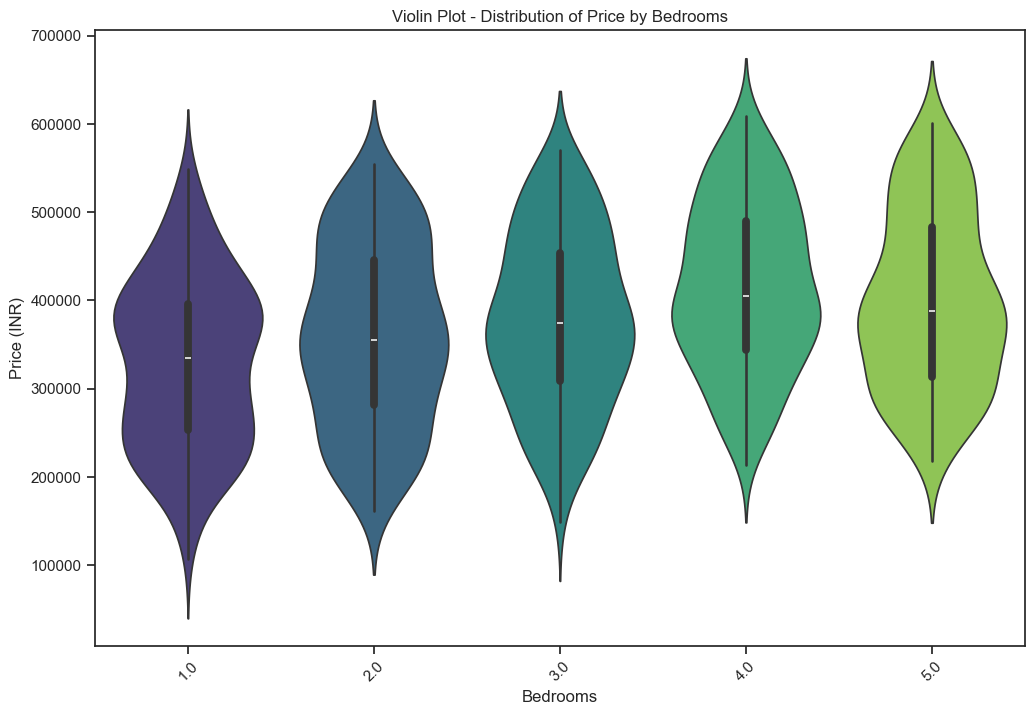

In [240]:
# 6. Violin Plot - Distribution of Price by Bedrooms
plt.figure(figsize=(12, 8))
sns.violinplot(x='Bedrooms', y='Price', data=data, palette='viridis')
plt.title('Violin Plot - Distribution of Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()



C:\Users\sachi\AppData\Local\Temp\ipykernel_1072\4012426687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Garage', data=data, palette='Set1')


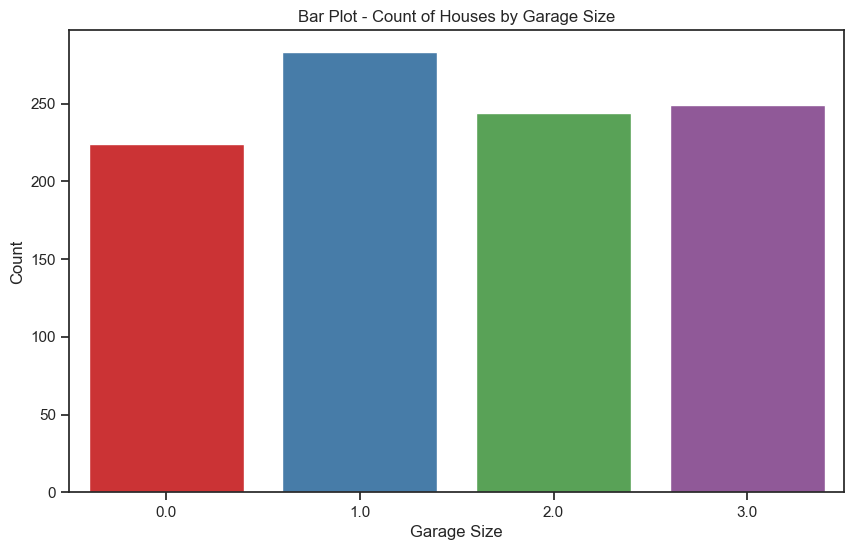

In [241]:
# 7. Bar Plot - Count of Houses by Garage Size
plt.figure(figsize=(10, 6))
sns.countplot(x='Garage', data=data, palette='Set1')
plt.title('Bar Plot - Count of Houses by Garage Size')
plt.xlabel('Garage Size')
plt.ylabel('Count')
plt.show()


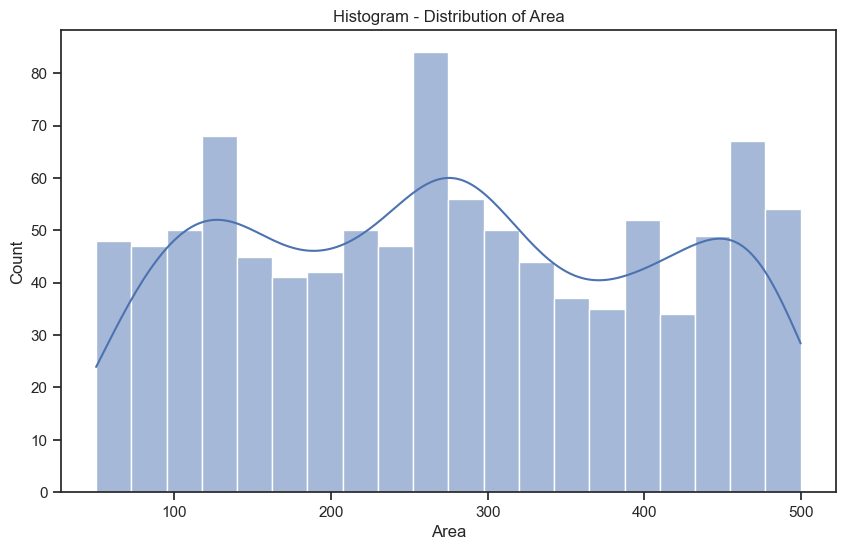

In [242]:
# 8. Histogram - Distribution of Area
plt.figure(figsize=(10, 6))
sns.histplot(data['Area'], bins=20, kde=True)
plt.title('Histogram - Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

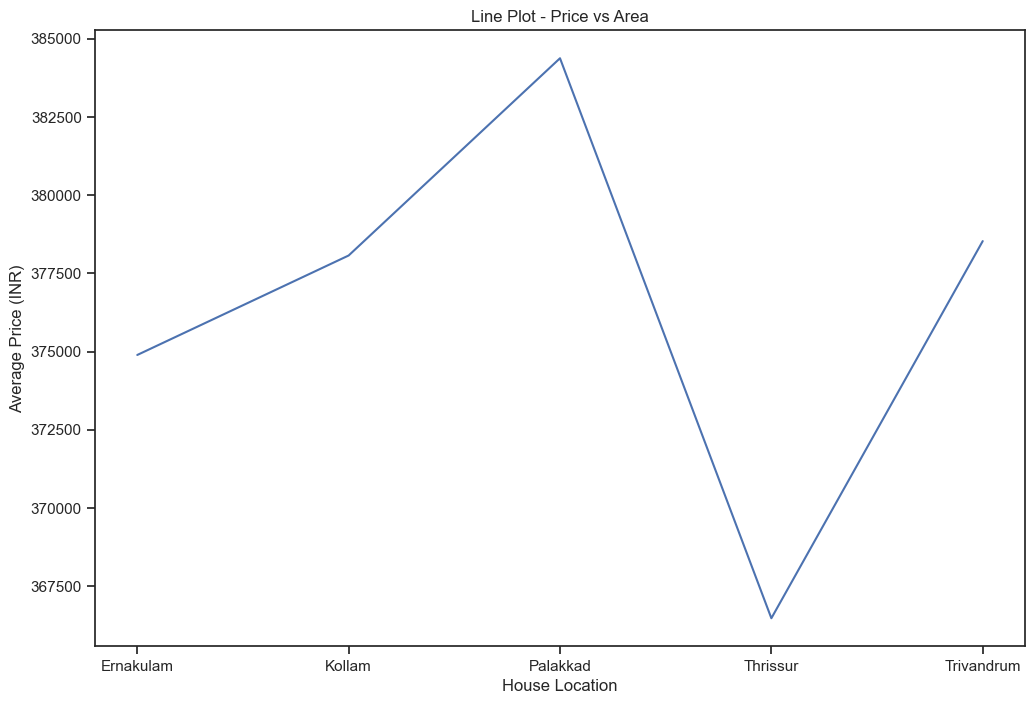

In [243]:
# 9. Line Plot - Price vs Location
plt.figure(figsize=(12, 8))
sns.lineplot(x='House Location', y='Price', data=data.groupby('House Location')['Price'].mean().reset_index())
plt.title('Line Plot - Price vs HouseLocation')
plt.xlabel('House Location')
plt.ylabel('Average Price (INR)')
plt.show()


<Figure size 1200x800 with 0 Axes>

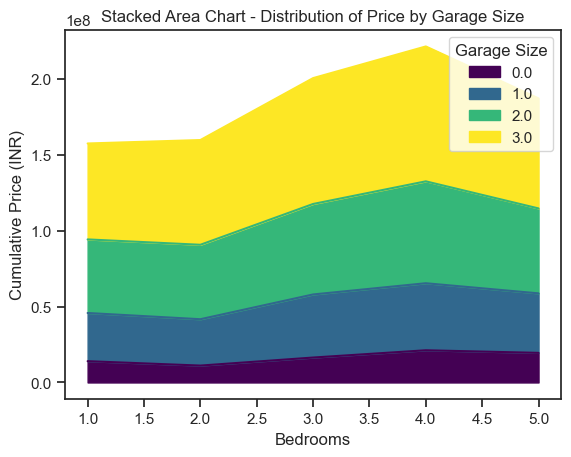

In [244]:
# 10. Stacked Area Chart - Distribution of Price by Garage Size
cumulative_price = data.groupby(['Bedrooms', 'Garage'])['Price'].sum().groupby(level=0).cumsum().unstack()

plt.figure(figsize=(12, 8))
cumulative_price.plot(kind='area', colormap='viridis', stacked=True)
plt.title('Stacked Area Chart - Distribution of Price by Garage Size')
plt.xlabel('Bedrooms')
plt.ylabel('Cumulative Price (INR)')
plt.legend(title='Garage Size')
plt.show()

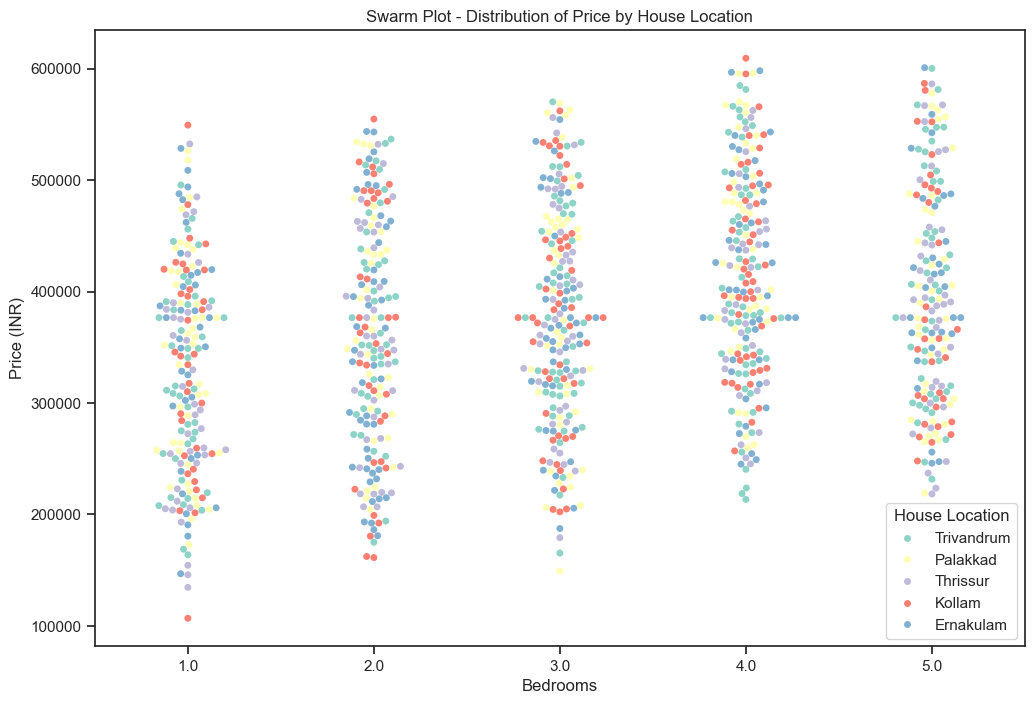

In [245]:
# 11. Swarm Plot - Distribution of Price by House Location
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Bedrooms', y='Price', data=data, hue='House Location', palette='Set3')
plt.title('Swarm Plot - Distribution of Price by House Location')
plt.xlabel('Bedrooms')
plt.ylabel('Price (INR)')
plt.legend(title='House Location')
plt.show()


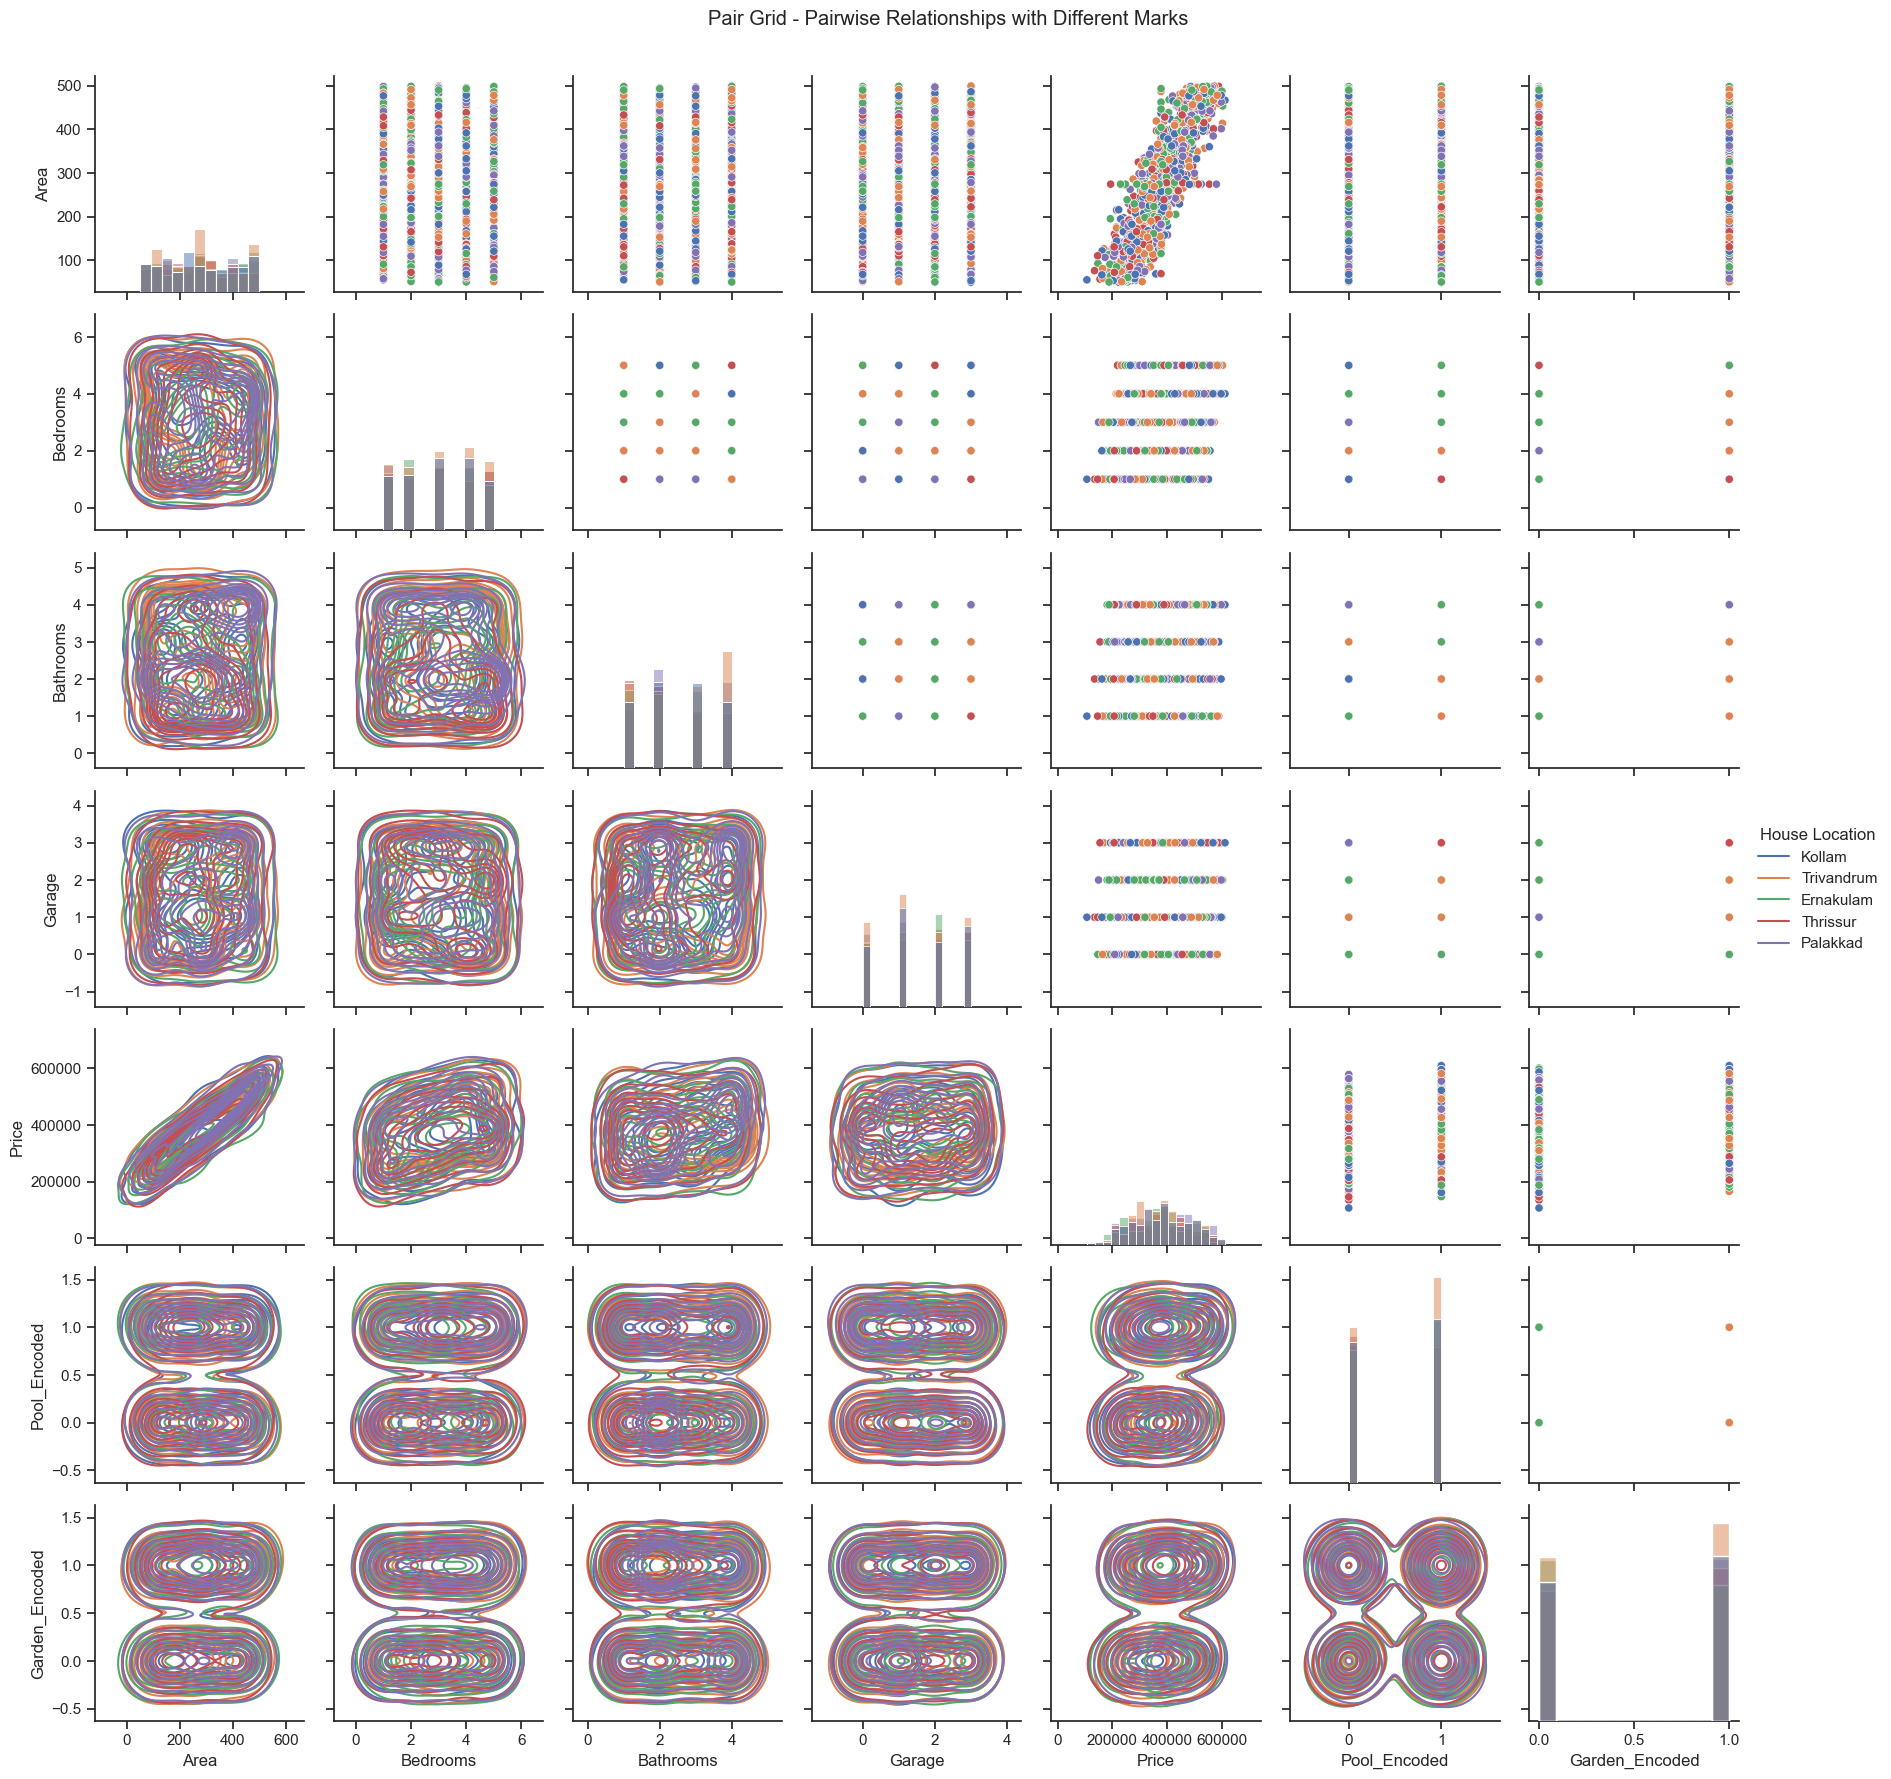

In [246]:
# 12. Pair Grid - Pairwise Relationships with Different Marks
sns.set(style="ticks")
g = sns.PairGrid(data, hue="House Location")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.suptitle('Pair Grid - Pairwise Relationships with Different Marks', y=1.02)
plt.show()

### Data Transformation

In [247]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# 1. Log Transformation of 'Price'
data['Log_Price'] = np.log1p(data['Price'])
data.drop('Price', axis=1, inplace=True)

# 2. Normalize 'Area' using Min-Max Scaling
scaler = MinMaxScaler()
data['Normalized_Area'] = scaler.fit_transform(data[['Area']])
data.drop('Area', axis=1, inplace=True)

#4. Dropping Normal Pool and Garden
data.drop(['Pool', 'Garden'], axis=1, inplace=True)

# Display the transformed dataset
print("Transformed Dataset:")
print(data)
print("\n")

data.to_csv('transformed_House_data.csv', index=False)


Transformed Dataset:
          Seller Name House Location  Bedrooms  Bathrooms  Garage  \
0        Patrick Lowe         Kollam       5.0        4.0     1.0   
1        Ricky Martin     Trivandrum       1.0        2.0     0.0   
2     Sabrina Hawkins     Trivandrum       4.0        4.0     1.0   
3        Barbara Holt      Ernakulam       4.0        3.0     1.0   
4        Kenneth Haas      Ernakulam       4.0        1.0     2.0   
..                ...            ...       ...        ...     ...   
995      Jason Walker      Ernakulam       5.0        3.0     0.0   
996      David Garcia     Trivandrum       4.0        3.0     1.0   
997  Theresa Lawrence     Trivandrum       2.0        1.0     2.0   
998       David Grant     Trivandrum       2.0        2.0     1.0   
999     Andrea Pierce      Ernakulam       4.0        1.0     2.0   

     Pool_Encoded  Garden_Encoded  Log_Price  Normalized_Area  
0               0               0  13.167413         0.499627  
1               0     